In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os

# --- This makes the notebook see the 'src' folder ---
# Go up one directory (from 'notebooks' to the root) and add it to the path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.data_preprocessing import load_data, clean_text

sns.set(style="darkgrid")
%matplotlib inline

In [3]:
# Load the raw data
RAW_DATA_PATH = '../data/raw/data.csv'
df = load_data(RAW_DATA_PATH)

print(df.head())

2025-11-13 00:06:35,309 - INFO - Loading data from ../data/raw/data.csv...
2025-11-13 00:06:36,823 - INFO - Data loading complete.


   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


2025-11-13 00:06:41,177 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-13 00:06:41,439 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


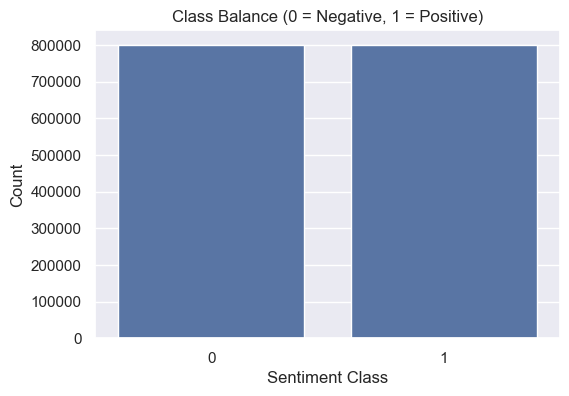

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Balance (0 = Negative, 1 = Positive)')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

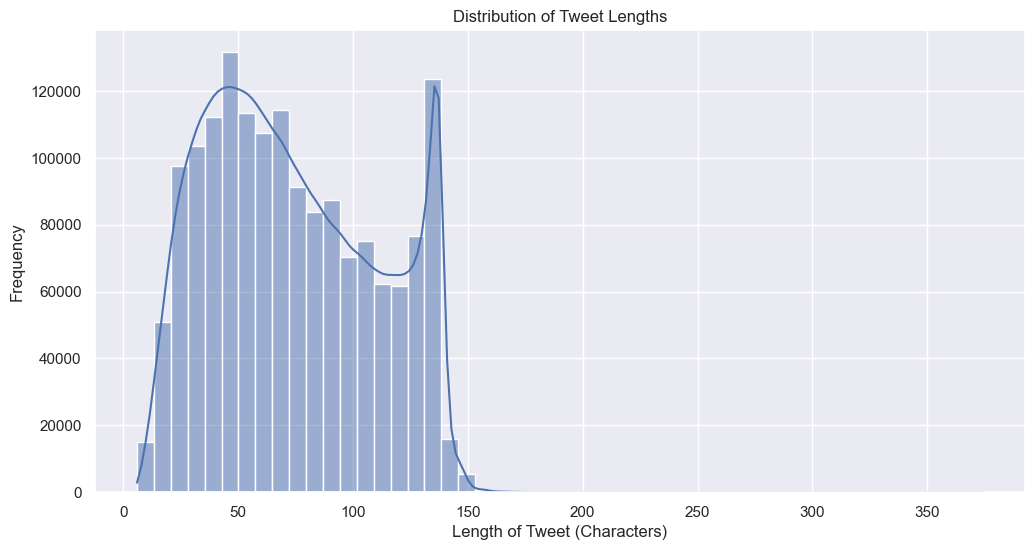

In [5]:
# Create a new column for raw text length
df['text_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet (Characters)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Take a sample (e.g., 100k tweets) for faster processing
df_sample = df.sample(100000, random_state=42)

# Apply your advanced cleaning function
print("Cleaning text for word clouds (this may take a minute)...")
df_sample['cleaned_text'] = df_sample['text'].apply(clean_text)
print("Cleaning complete.")

Cleaning text for word clouds (this may take a minute)...
Cleaning complete.


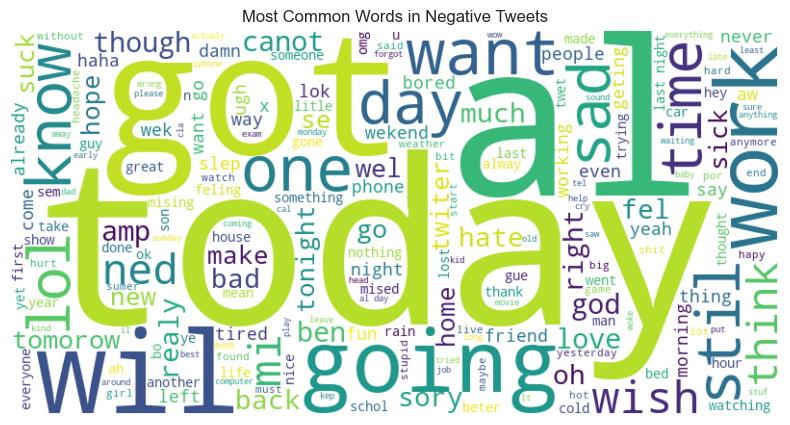

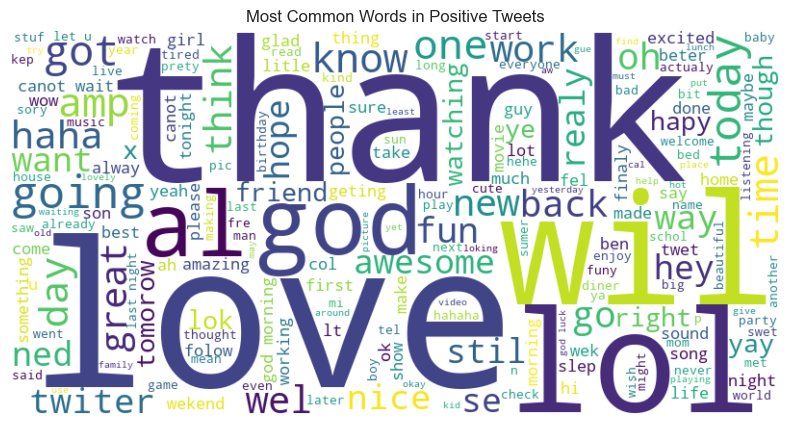

In [7]:
# Separate positive and negative tweets
df_neg = df_sample[df_sample['target'] == 0]
df_pos = df_sample[df_sample['target'] == 1]

# Combine all text into two big strings
neg_text = " ".join(text for text in df_neg['cleaned_text'])
pos_text = " ".join(text for text in df_pos['cleaned_text'])

# --- Negative Word Cloud ---
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Most Common Words in Negative Tweets')
plt.axis('off')
plt.show()

# --- Positive Word Cloud ---
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Most Common Words in Positive Tweets')
plt.axis('off')
plt.show()